In [46]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras import regularizers

In [69]:
encoding_dim = 32
#l1=10e-9
l1 =1e-6
input_img = Input(shape=(784,))

# activity regularizerを加える
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(l1))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

l1=10e-7  # L1正則化のパラメータ
enc_dim = 512  # 隠れ層のユニット数

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [70]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [71]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3864 - val_loss: 0.2892
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2823 - val_loss: 0.2737
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2661 - val_loss: 0.2563
Epoch 4/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.2497 - val_loss: 0.2408
Epoch 5/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2360 - val_loss: 0.2285
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.2250 - val_loss: 0.2189
Epoch 7/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2165 - val_loss: 0.2116
Epoch 8/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.2101 - val_loss: 0.2062
Epoch 9/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2051 - val_loss: 0.2016
Epoch

In [72]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

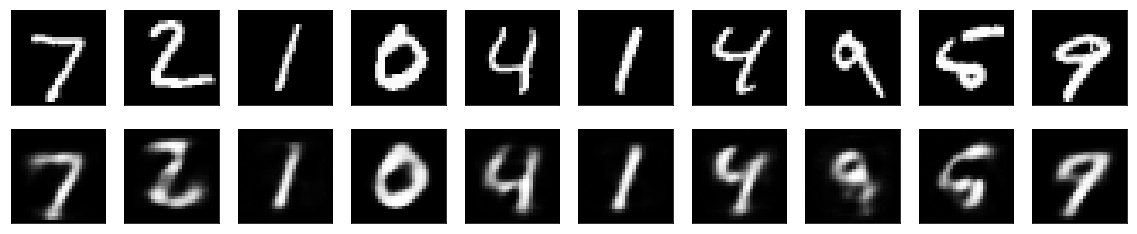

In [73]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  #軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  #軸の値の表示を無効化
plt.show()

In [74]:
encoder = Model(input=input_img, output=encoded)
encoded_imgs = encoder.predict(x_test)

print('encoded img mean:', encoded_imgs.mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


encoded img mean: 1.7839683
